### Importing libraries:

In [150]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots, show
import scipy

### Simulating a 2 dimensional data:

In [131]:
np.random.seed(42)
X = 2*np.random.randn(1000,1)
Y = 10 + 2*X + np.random.randn(1000,1)

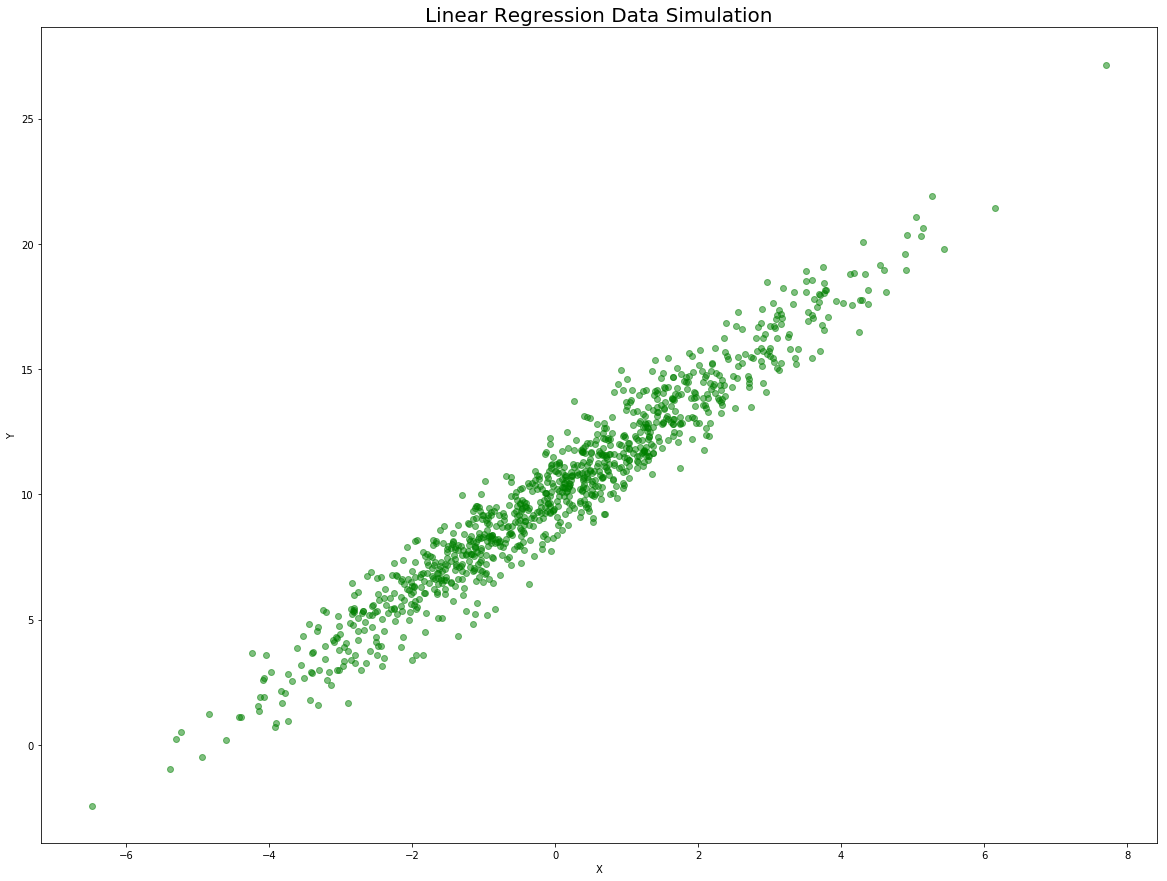

In [132]:
plt.figure(figsize=(20,15))
plt.axis(aspect='equal')
plt.axes(xlabel="X",ylabel="Y")
plt.title('Linear Regression Data Simulation', fontsize=20)
plt.scatter(X,Y, marker='o', c='g', alpha = 0.5)
plt.show()

### Linear Regression Model (Vectorized form):
$Y = h_\theta(X) = \theta^T.X$

### Normal Equation: ${\theta} = {(X^T.X)^{-1}}.X^T.Y$

In [149]:
X_p = np.c_[np.ones((1000,1)),X] #concatenate by column
theta = np.linalg.inv(X_p.T.dot(X_p)).dot(X_p.T).dot(Y) #normal equation formula
print("The best theta by Normal Equation: \n{}".format(theta))

The best theta by Normal Equation: 
[[10.0716318 ]
 [ 1.97942383]]


### Creating a new instance:

In [140]:
X_new = np.array([[0],[5]])
X_new_p = np.c_[np.ones((2,1)),X_new]
print("New instance: \n{}".format(X_new_p))

New instance: 
[[1. 0.]
 [1. 5.]]


### Predicting:

In [141]:
pred = X_new_p.dot(theta)
print("Result: \n{}".format(pred))

Result: 
[[10.0716318 ]
 [19.96875094]]


### Comparing with Scikit-Learn:

In [155]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
linReg.fit(X,Y)
print("The best theta by Scikit-Learn Normal Equation Algorithm: \n Intercept: {} \n Slope:{}\n\n".format(linReg.intercept_, linReg.coef_))
linReg_pred = linReg.predict(X_new)
print("Result by Scikit-Learn: \n{}".format(linReg_pred))

The best theta by Scikit-Learn Normal Equation Algorithm: 
 Intercept: [10.0716318] 
 Slope:[[1.97942383]]


Result by Scikit-Learn: 
[[10.0716318 ]
 [19.96875094]]


### Printing Results:

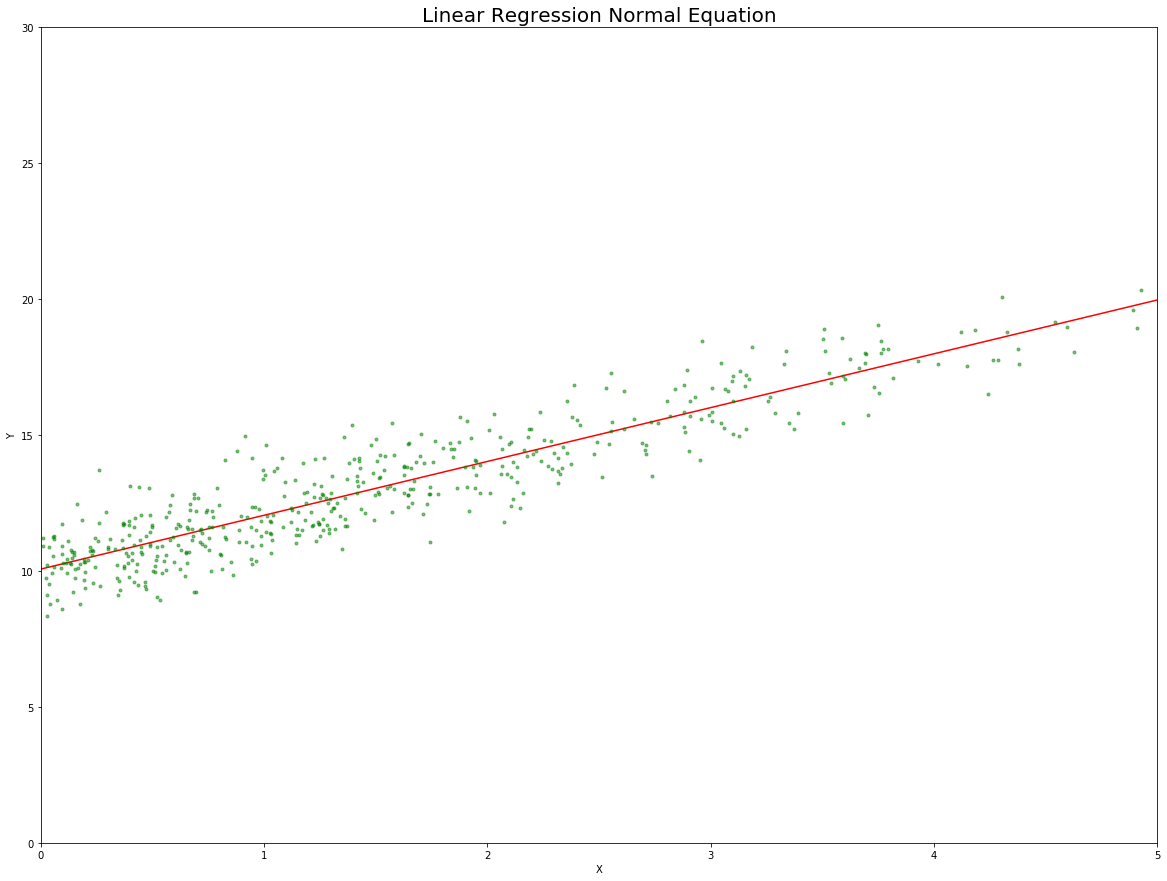

In [146]:
plt.figure(figsize=(20,15))
plt.axes(xlabel="X",ylabel="Y")
plt.title('Linear Regression Normal Equation', fontsize=20)
plt.plot(X_new,pred,'r-')
plt.plot(X,Y,"g.", alpha=0.5)
plt.axis([0,5,0,30])
plt.show()

# About Normal Equation:

 Normal equation computes the inverse o ${X^T.X}$. Since it's a $n$ x $n$ matrix, where n is the number of features, the computational cost for this function is about $O(n^{2.4})$ or $O(n^3)$. It means that if you triple the number of features, the time to computes this algorithm will by multiplied for $3^{2.4}=13.96$ to $3^3=27$.
 
 On the other hand, this equation has a linear behavior with the number of instances (O(m)), so it handles a large training set.